In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:

# Load the dataset
import pandas as pd

# Load the DataFrame
df = pd.read_csv('movehistory.csv')

# Set the display options to show all columns
pd.set_option('display.max_columns', None) 

df

,game_id,move_no,move_no_pair,player,notation,move,from_square,to_square,piece,color,fen,is_check,is_check_mate,is_fifty_moves,is_fivefold_repetition,is_game_over,is_insufficient_material,white_count,black_count,white_pawn_count,black_pawn_count,white_queen_count,black_queen_count,white_bishop_count,black_bishop_count,white_knight_count,black_knight_count,white_rook_count,black_rook_count,captured_score_for_white,captured_score_for_black,move_sequence
0,86e0b7f5-7b94-4ae3-97c8-317371622795,1,1,jhon,e4,e2e4,e2,e4,P,White,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR,0,0,0,0,0,1,16,16,8,8,1,1,2,2,2,2,2,2,0.0,0.0,e4
1,86e0b7f5-7b94-4ae3-97c8-317371622795,2,1,max,e5,e7e5,e7,e5,P,Black,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR,0,0,0,0,0,1,16,16,8,8,1,1,2,2,2,2,2,2,0.0,0.0,e4|e5
2,86e0b7f5-7b94-4ae3-97c8-317371622795,3,2,jhon,Nf3,g1f3,g1,f3,N,White,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R,0,0,0,0,0,1,16,16,8,8,1,1,2,2,2,2,2,2,0.0,0.0,e4|e5|Nf3
3,86e0b7f5-7b94-4ae3-97c8-317371622795,4,2,max,Nc6,b8c6,b8,c6,N,Black,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,0,0,0,0,0,1,16,16,8,8,1,1,2,2,2,2,2,2,0.0,0.0,e4|e5|Nf3|Nc6
4,86e0b7f5-7b94-4ae3-97c8-317371622795,5,3,jhon,Bb5,f1b5,f1,b5,B,White,r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/R...,0,0,0,0,0,1,16,16,8,8,1,1,2,2,2,2,2,2,0.0,0.0,e4|e5|Nf3|Nc6|Bb5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,86e0b7f5-7b94-4ae3-97c8-317371622795,107,54,jhon,Rb1,d1b1,d1,b1,R,White,8/4k3/R3N1p1/5p1p/3p1P1P/3P4/2K2P2/1R6,0,0,0,0,0,1,8,5,4,4,0,0,0,0,1,0,2,0,NaN,NaN,e4|e5|Nf3|Nc6|Bb5|a6|Ba4|Nf6|O-O|Be7|Re1|b5|Bb...
107,86e0b7f5-7b94-4ae3-97c8-317371622795,108,54,max,g5,g6g5,g6,g5,P,Black,8/4k3/R3N3/5ppp/3p1P1P/3P4/2K2P2/1R6,0,0,0,0,0,1,8,5,4,4,0,0,0,0,1,0,2,0,NaN,NaN,e4|e5|Nf3|Nc6|Bb5|a6|Ba4|Nf6|O-O|Be7|Re1|b5|Bb...
108,86e0b7f5-7b94-4ae3-97c8-317371622795,109,55,jhon,Rb7+,b1b7,b1,b7,R,White,8/1R2k3/R3N3/5ppp/3p1P1P/3P4/2K2P2/8,1,0,0,0,0,1,8,5,4,4,0,0,0,0,1,0,2,0,NaN,NaN,e4|e5|Nf3|Nc6|Bb5|a6|Ba4|Nf6|O-O|Be7|Re1|b5|Bb...
109,86e0b7f5-7b94-4ae3-97c8-317371622795,110,55,max,Ke8,e7e8,e7,e8,K,Black,4k3/1R6/R3N3/5ppp/3p1P1P/3P4/2K2P2/8,0,0,0,0,0,1,8,5,4,4,0,0,0,0,1,0,2,0,NaN,NaN,e4|e5|Nf3|Nc6|Bb5|a6|Ba4|Nf6|O-O|Be7|Re1|b5|Bb...


In [2]:
print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['game_id', 'move_no', 'move_no_pair', 'player', 'notation', 'move',
       'from_square', 'to_square', 'piece', 'color', 'fen', 'is_check',
       'is_check_mate', 'is_fifty_moves', 'is_fivefold_repetition',
       'is_game_over', 'is_insufficient_material', 'white_count',
       'black_count', 'white_pawn_count', 'black_pawn_count',
       'white_queen_count', 'black_queen_count', 'white_bishop_count',
       'black_bishop_count', 'white_knight_count', 'black_knight_count',
       'white_rook_count', 'black_rook_count', 'captured_score_for_white',
       'captured_score_for_black', 'move_sequence'],
      dtype='object')


Move: e4, Score: 1
Move: Nf3, Score: 1
Move: Bb5, Score: 1
Move: Ba4, Score: 1
Move: Bb3, Score: 1
Move: h3, Score: 1
Move: Nxe5, Score: 1
Move: axb3, Score: 1
Move: d3, Score: 1
Move: exd5, Score: 1
Move: Kf1, Score: 1
Move: Bd2, Score: 1
Move: Nc3, Score: 1
Move: Ne2, Score: 1
Move: Be3, Score: 1
Move: Bf4, Score: 1
Move: gxf3, Score: 1
Move: Nxf4, Score: 1
Move: c3, Score: 1
Move: Ng2, Score: 1
Move: Ne1, Score: 1
Move: Ke2, Score: 1
Move: Kd2, Score: 1
Move: bxc3, Score: 1
Move: Kc2, Score: 1
Move: h4, Score: 1
Move: Ne3, Score: 1
Move: Nc4, Score: 1
Move: Ne5, Score: 1
Move: f4, Score: 1
Move: Nd6+, Score: 1
Move: Nb7, Score: 1
Move: Nxd8, Score: 1
Move: Ne6+, Score: 1
Move: Nc6, Score: 0
Move: Nf6, Score: 0
Move: Be7, Score: 0
Move: Re1, Score: 0
Move: Na5, Score: 0
Move: Nxb3, Score: 0
Move: Bb7, Score: 0
Move: Qxd5, Score: 0
Move: Qf3, Score: 0
Move: Bd6, Score: 0
Move: Nxd5, Score: 0
Move: Nb4, Score: 0
Move: Rec1, Score: 0
Move: Ne7, Score: 0
Move: Bxf3, Score: 0
Move: Bxf4, 

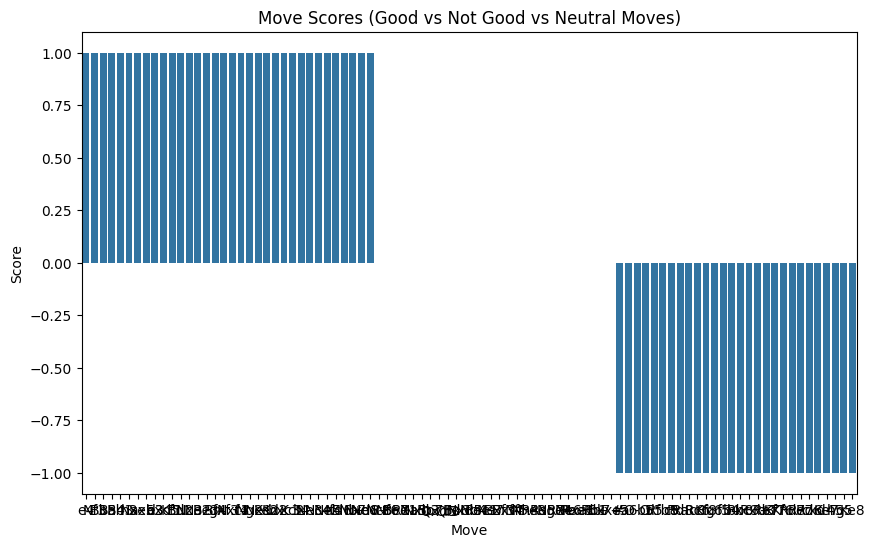

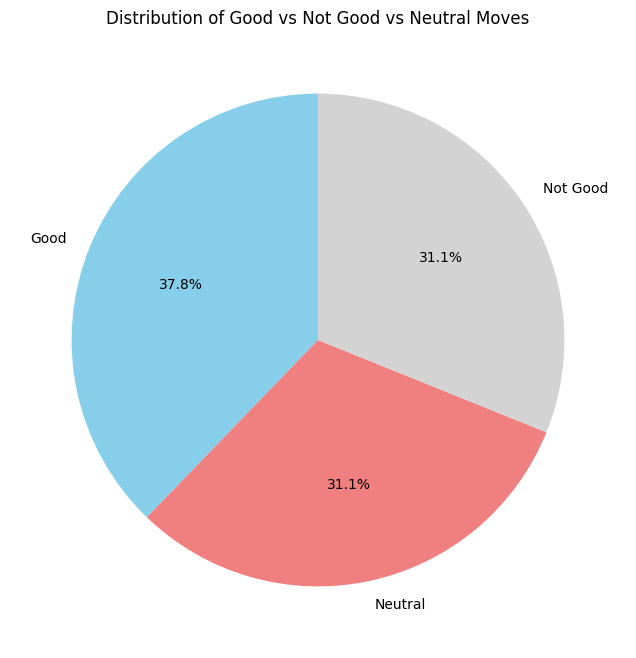

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Function to evaluate moves
def evaluate_moves(df):
    # Create a dictionary to store the evaluation scores for each move.
    move_scores = {}
    # Iterate over all moves in the DataFrame and evaluate them.
    for index, row in df.iterrows():
        #Convert to string and split the moves
        moves = str(row['notation']).split()  
        for move in moves:
            score = evaluate_move(row, move)
            move_scores[move] = score
    # Sort the moves in descending order by evaluation score.
    sorted_moves = sorted(move_scores.items(), key=lambda x: x[1], reverse=True)
    # Return the sorted list of moves.
    return sorted_moves
# Function to evaluate a single move
def evaluate_move(row, move):
    score = 0
    # Good Moves
    if is_material_gain(row):
        score += 1
    if contributes_to_king_safety(row):
        score += 1
    if promotes_piece_development(row):
        score += 1
    if creates_threats_or_attacks(row):
        score += 1

    # Not Good Moves
    if is_material_loss(row):
        score -= 1
    if compromises_king_safety(row):
        score -= 1
    if leads_to_poor_piece_coordination(row):
        score -= 1
    if ignores_threats(row):
        score -= 1

    return score
    # Calculate the material gain/loss from the move.
    material_gain_loss = calculate_material_gain_loss(row['piece'], row['color'])
    # Calculate the contribution of the move to king safety
    king_safety_contribution = calculate_king_safety_contribution(row)
    # Calculate the contribution of the move to piece development.
    piece_development_contribution = calculate_piece_development_contribution(row)
    # Calculate the number of threats created by the move.
    num_threats = calculate_num_threats(row)
    # Calculate the total evaluation score for the move.
    score = material_gain_loss + king_safety_contribution 
    +piece_development_contribution + num_threats
    return score
# Functions to check the criteria
def is_material_gain(row):
    return row['piece'] == 'P' and row['color'] == 'White'

def contributes_to_king_safety(row):
    return row['piece'] == 'K' and row['color'] == 'White'

def promotes_piece_development(row):
    return row['piece'] == 'N' and row['color'] == 'White'
def creates_threats_or_attacks(row):
    return row['piece'] == 'B' and row['color'] == 'White'
def is_material_loss(row):
    return row['piece'] == 'P' and row['color'] == 'Black'
def compromises_king_safety(row):
    return row['piece'] == 'K' and row['color'] == 'Black'
def leads_to_poor_piece_coordination(row):
    return row['piece'] == 'R' and row['color'] == 'Black'
def ignores_threats(row):
    return row['piece'] == 'Q' and row['color'] == 'Black'
# Function to calculate the material gain/loss from a move
def calculate_material_gain_loss(piece, color):
    # Material values for each piece.
    piece_values = {
        'P': 1,
        'N': 3,
        'B': 3,
        'R': 5,
        'Q': 9,
    }
    # Calculate the material gain/loss.
    material_gain_loss = piece_values[piece] * (1 if color == 'white' else -1)
    return material_gain_loss
# Function to calculate the contribution of a move to king safety
def calculate_king_safety_contribution(row):
# Extract relevant information from the row
    piece = row['piece']
    color = row['color']
    from_square = row['from_square']
    to_square = row['to_square']
    # Placeholder implementation, replace with meaningful calculations
    king_safety_contribution = 0
    # Example: Penalize moving the king
    if piece.lower() == 'k':
        king_safety_contribution -= 2
      # Example: Reward castling for king safety
    if piece.lower() == 'k' and from_square == 'e1' and to_square in ('g1', 'c1'):
        king_safety_contribution += 3
      # Example: Penalize exposing the king to checks
    if row['is_check']:
        king_safety_contribution -= 1
        return king_safety_contribution
# Function to calculate the contribution of a move to piece development
def calculate_piece_development_contribution(row):     
      # Extract relevant information from the row
      piece = row['piece']
      color = row['color']
      from_square = row['from_square']
      to_square = row['to_square']
    
      # Placeholder implementation, replace with meaningful calculations
      piece_development_contribution = 0
    
      # Example: Reward pawn moves for opening lines for bishops and queen
      if piece.lower() == 'p' and (from_square[1] == '2' or from_square[1] == '7'):
          piece_development_contribution += 1
    
      # Example: Penalize moving the same piece multiple times
      if row['move_sequence'] and len(row['move_sequence'].split()) > 1:
          piece_development_contribution -= 1
    
      # Example: Penalize moving pieces into closed positions
      if to_square in ['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1',
                       'a8', 'b8', 'c8', 'd8', 'e8', 'f8', 'g8', 'h8']:
              
         piece_development_contribution -= 1
    
      # Add more criteria based on your evaluation
         return piece_development_contribution
    

# Function to calculate the number of threats created by a move
def calculate_num_threats(row):
    # Placeholder implementation, replace with meaningful calculations
    num_threats = 0
    
    # Example: Reward moves that put the opponent's king in check
    if row['is_check']:
        num_threats += 1
    
    # Example: Reward moves that capture opponent pieces
    if row['captured_score_for_black'] > 0:
        num_threats += 1
    
    # Example: Penalize moves that result in the player's own pieces being captured
    if row['captured_score_for_white'] < 0:
        num_threats -= 1
    
    # Additional conditions:
    # Example: Reward moves that attack the opponent's queen
    if row['attacked_piece'] == 'Q' and row['attacked_color'] == 'black':
        num_threats += 1
    
    # Example: Penalize moves that expose the player's queen to capture
    if row['attacked_piece'] == 'Q' and row['attacked_color'] == 'white':
        num_threats -= 1

    # Add more conditions based on your evaluation criteria
    
    return num_threats

    
    return score


# Example usage
move_results = evaluate_moves(df)

# Display results
for move, score in move_results:
    print(f"Move: {move}, Score: {score}")


# Convert move_results to a DataFrame for easier plotting
df_moves = pd.DataFrame(list(move_results), columns=['Move', 'Score'])


# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Move', y='Score', data=df_moves)
plt.title('Move Scores (Good vs Not Good vs Neutral Moves)')
plt.xlabel('Move')
plt.ylabel('Score')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
df_moves['Move Category'] = df_moves['Score'].apply(lambda x: 'Good' if x > 0 else ('Neutral' if x == 0 else 'Not Good'))
df_pie = df_moves['Move Category'].value_counts()
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgray'])
plt.title('Distribution of Good vs Not Good vs Neutral Moves')
plt.show()





In [9]:
# Assuming df_moves is your DataFrame with 'Move' and 'Score' columns
df_moves['Score_Class'] = pd.cut(df_moves['Score'], bins=[float('-inf'), -0.5, 0.5, float('inf')], labels=['-1', '0', '1'])

# Assuming df is your main DataFrame with moves and features
features = df[['captured_score_for_white', 'captured_score_for_black', 'is_check', 'is_check_mate', 'move_sequence', 'fen']]
target_moves = df_moves['Move']
target_class = df_moves['Score_Class']

# Filter features and target based on moves with scores
mask = features.index.isin(target_moves.index)
features = features[mask]
target = target_class

# Convert categorical features to numerical using one-hot encoding if needed
features = pd.get_dummies(features)

# Train your model using features and target
# Example:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Train a logistic regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

logreg_model.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the logistic regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Model Accuracy: {logreg_accuracy}')



Shape of X_train: (72, 180)
Shape of y_train: (72,)
Shape of X_test: (18, 180)
Shape of y_test: (18,)
Logistic Regression Model Accuracy: 0.9444444444444444


In [10]:
# Make predictions
predictions = logreg_model.predict(X_test)

# Print the predicted class labels
print("Predicted Labels:", predictions)


Predicted Labels: ['0' '1' '0' '-1' '1' '1' '0' '0' '1' '0' '-1' '0' '0' '-1' '1' '1' '1'
 '1']


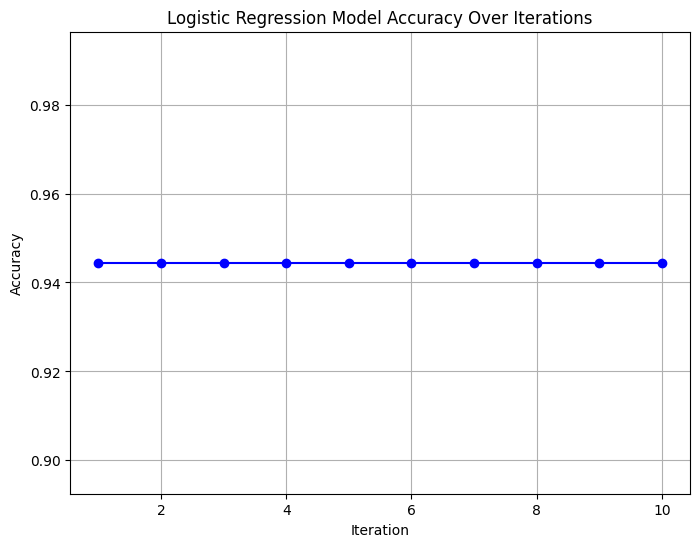

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # Add this import
from sklearn.model_selection import train_test_split


# Assuming you have multiple iterations or different test sets
# Replace this loop with your actual iterations or variations
# For simplicity, this example uses the same test set multiple times
iterations = 10
accuracy_values = []

for _ in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    logreg_model = LogisticRegression(random_state=42, max_iter=1000)

    logreg_model.fit(X_train, y_train)

    logreg_predictions = logreg_model.predict(X_test)

    logreg_accuracy = accuracy_score(y_test, logreg_predictions)
    accuracy_values.append(logreg_accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations + 1), accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Logistic Regression Model Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\2068206147.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


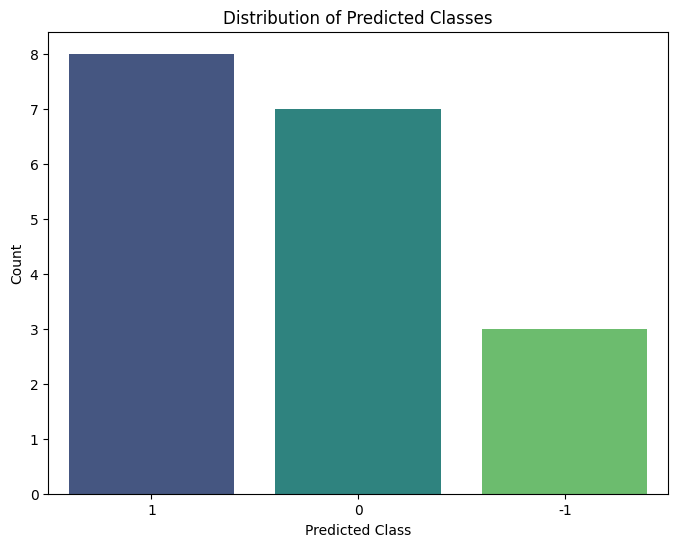

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in predictions
class_counts = pd.Series(logreg_predictions).value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()


In [2]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


In [15]:
import chess
import chess.engine
from IPython.display import display, HTML
import chess.svg
import pandas as pd
import traceback
from stockfish import Stockfish

def display_board(board, size=300):
    display(HTML(chess.svg.board(board=board, size=size)))

# Specify the full path to Stockfish executable
stockfish_path = r"stockfish/stockfish-windows-x86-64-avx2.exe"
def provide_coaching(engine, board, suggested_move, df_moves):
    try:
        # Check if the suggested move is in the list of moves from the dataframe
        if suggested_move in df_moves:
            return "Great move! It matches the suggested move from the dataframe."
        else:
            # Use Stockfish to analyze the advantages of the suggested move
            analysis = engine.analyse(board, chess.engine.Limit(time=2.0), root_moves=[suggested_move])

            # Fetch the evaluation from Stockfish
            evaluation = analysis['score'].relative.score()

            # Your coaching logic for the advantages of the suggested move goes here
            coaching_feedback = f"Consider the advantages of playing {suggested_move}. Stockfish evaluation: {evaluation}"

            # Suggest further moves based on the suggested move
            next_moves = engine.analysis(board, chess.engine.Limit(time=5.0), root_moves=[suggested_move])

            # Check if next_moves is a list and has elements
            if isinstance(next_moves, list) and next_moves:
                # Check if 'pv' key is present in the analysis
                if isinstance(next_moves[0], dict) and 'pv' in next_moves[0]:
                    next_moves_san = [move['pv'][0] for move in next_moves]
                    coaching_feedback += f"\nIf you play {suggested_move}, Stockfish suggests the following next moves: {next_moves_san}"
                else:
                    coaching_feedback += f"\nStockfish did not provide principal variation information for the suggested move."
            else:
                coaching_feedback += f"\nStockfish did not suggest any next moves after playing {suggested_move}."

            return coaching_feedback

    except Exception as e:
        # Print information about the exception
        print(f"Error during Stockfish analysis: {e}")
        traceback.print_exc()
def provide_coaching_with_next_moves(engine, board, suggested_move, df_moves):
    try:
        # Check if the suggested move is in the list of moves from the dataframe
        if suggested_move in df_moves:
            feedback = "Great move! It matches the suggested move from the dataframe."
        else:
            # Use Stockfish to analyze the advantages of the suggested move
            analysis = engine.analyse(board, chess.engine.Limit(time=2.0), root_moves=[suggested_move])

            # Fetch the evaluation from Stockfish
            evaluation = analysis['score'].relative.score()

            # Coaching logic for the advantages of the suggested move
            coaching_feedback = f"Consider the advantages of playing {suggested_move}. Stockfish evaluation: {evaluation}"

            # Suggest further moves based on the suggested move
            next_moves = engine.analysis(board, chess.engine.Limit(time=5.0), root_moves=[suggested_move])

            # Check if next_moves is a list and has elements
            if isinstance(next_moves, list) and next_moves:
                # Check if 'pv' key is present in the analysis
                if isinstance(next_moves[0], dict) and 'pv' in next_moves[0]:
                    next_moves_san = [move['pv'][0] for move in next_moves]
                    coaching_feedback += f"\nIf you play {suggested_move}, Stockfish suggests the following next moves: {next_moves_san}"
                    
                    # Loop over suggested moves and provide coaching for each
                    for next_move in next_moves_san:
                        next_board = board.copy()
                        next_board.push(chess.Move.from_uci(next_move))
                        
                        coaching_feedback += f"\n{provide_coaching_with_next_moves(engine, next_board, next_move, df_moves)}"
                else:
                    coaching_feedback += f"\nStockfish did not provide principal variation information for the suggested move."
            else:
                coaching_feedback += f"\nStockfish did not suggest any next moves after playing {suggested_move}."

            return coaching_feedback

    except Exception as e:
        # Print information about the exception
        print(f"Error during Stockfish analysis: {e}")
        traceback.print_exc()
        return f"Error during Stockfish analysis: {e}"


# Example usage
def coaching_session(df):
    with chess.engine.SimpleEngine.popen_uci(stockfish_path) as engine:
        for _, row in df.iterrows():
            fen = row['fen']
            board = chess.Board(fen)
            df_moves = row['move'].split()  # Assuming 'moves' column contains space-separated moves

            try:
                # Display the current board position
                display_board(board)

                # Use Stockfish to analyze the position
                result = engine.play(board, chess.engine.Limit(time=10.0))
                suggested_move = result.move
                print(f"Stockfish suggests: {suggested_move}")

                # Provide coaching feedback or corrections based on the move
                coaching_feedback = provide_coaching(engine, board, suggested_move, df_moves)

                # Print coaching feedback
                print(coaching_feedback)

            except Exception as e:
                # Print information about the exception
                print(f"Error during engine calculation: {e}")
                traceback.print_exc()


# Example usage
coaching_session(df)


Stockfish suggests: d2d4
Consider the advantages of playing d2d4. Stockfish evaluation: 70
Stockfish did not suggest any next moves after playing d2d4.


Stockfish suggests: d2d4
Consider the advantages of playing d2d4. Stockfish evaluation: 10
Stockfish did not suggest any next moves after playing d2d4.


Stockfish suggests: f3e5
Consider the advantages of playing f3e5. Stockfish evaluation: 128
Stockfish did not suggest any next moves after playing f3e5.


Stockfish suggests: f1c4
Consider the advantages of playing f1c4. Stockfish evaluation: 12
Stockfish did not suggest any next moves after playing f1c4.


Stockfish suggests: d2d3
Consider the advantages of playing d2d3. Stockfish evaluation: 45
Stockfish did not suggest any next moves after playing d2d3.


Stockfish suggests: b5a4
Consider the advantages of playing b5a4. Stockfish evaluation: 15
Stockfish did not suggest any next moves after playing b5a4.


Stockfish suggests: c2c3
Consider the advantages of playing c2c3. Stockfish evaluation: 50
Stockfish did not suggest any next moves after playing c2c3.


Stockfish suggests: b1c3
Consider the advantages of playing b1c3. Stockfish evaluation: 14
Stockfish did not suggest any next moves after playing b1c3.


Stockfish suggests: a4c6
Consider the advantages of playing a4c6. Stockfish evaluation: 193
Stockfish did not suggest any next moves after playing a4c6.


Stockfish suggests: f1e1
Consider the advantages of playing f1e1. Stockfish evaluation: 108
Stockfish did not suggest any next moves after playing f1e1.


Stockfish suggests: a4c6
Consider the advantages of playing a4c6. Stockfish evaluation: 219
Stockfish did not suggest any next moves after playing a4c6.


Stockfish suggests: a4b3
Consider the advantages of playing a4b3. Stockfish evaluation: 123
Stockfish did not suggest any next moves after playing a4b3.


Stockfish suggests: a2a4
Consider the advantages of playing a2a4. Stockfish evaluation: 196
Stockfish did not suggest any next moves after playing a2a4.


Stockfish suggests: c2c3
Consider the advantages of playing c2c3. Stockfish evaluation: 47
Stockfish did not suggest any next moves after playing c2c3.


Stockfish suggests: c2c3
Consider the advantages of playing c2c3. Stockfish evaluation: 61
Stockfish did not suggest any next moves after playing c2c3.


Stockfish suggests: f3e5
Consider the advantages of playing f3e5. Stockfish evaluation: 31
Stockfish did not suggest any next moves after playing f3e5.


Stockfish suggests: e5f7
Consider the advantages of playing e5f7. Stockfish evaluation: 202
Stockfish did not suggest any next moves after playing e5f7.


Stockfish suggests: a2b3
Consider the advantages of playing a2b3. Stockfish evaluation: 24
Stockfish did not suggest any next moves after playing a2b3.


Stockfish suggests: d2d4
Consider the advantages of playing d2d4. Stockfish evaluation: 178
Stockfish did not suggest any next moves after playing d2d4.


Stockfish suggests: d2d3
Consider the advantages of playing d2d3. Stockfish evaluation: 37
Stockfish did not suggest any next moves after playing d2d3.


Stockfish suggests: e5f3
Consider the advantages of playing e5f3. Stockfish evaluation: 128
Stockfish did not suggest any next moves after playing e5f3.


Stockfish suggests: e4d5
Consider the advantages of playing e4d5. Stockfish evaluation: 48
Stockfish did not suggest any next moves after playing e4d5.


Stockfish suggests: c2c4
Consider the advantages of playing c2c4. Stockfish evaluation: 352
Stockfish did not suggest any next moves after playing c2c4.


Stockfish suggests: d1f3
Consider the advantages of playing d1f3. Stockfish evaluation: 39
Stockfish did not suggest any next moves after playing d1f3.


Stockfish suggests: b1c3
Consider the advantages of playing b1c3. Stockfish evaluation: 103
Stockfish did not suggest any next moves after playing b1c3.


Stockfish suggests: g1f1
Consider the advantages of playing g1f1. Stockfish evaluation: 39
Stockfish did not suggest any next moves after playing g1f1.


Stockfish suggests: b1c3
Consider the advantages of playing b1c3. Stockfish evaluation: 104
Stockfish did not suggest any next moves after playing b1c3.


Stockfish suggests: f3d5
Consider the advantages of playing f3d5. Stockfish evaluation: 35
Stockfish did not suggest any next moves after playing f3d5.


Stockfish suggests: d5f7
Consider the advantages of playing d5f7. Stockfish evaluation: 907
Stockfish did not suggest any next moves after playing d5f7.


Stockfish suggests: c1d2
Consider the advantages of playing c1d2. Stockfish evaluation: 32
Stockfish did not suggest any next moves after playing c1d2.


Stockfish suggests: e5f3
Consider the advantages of playing e5f3. Stockfish evaluation: 49
Stockfish did not suggest any next moves after playing e5f3.


Stockfish suggests: b1c3
Consider the advantages of playing b1c3. Stockfish evaluation: 46
Stockfish did not suggest any next moves after playing b1c3.


Stockfish suggests: e1d1
Consider the advantages of playing e1d1. Stockfish evaluation: 44
Stockfish did not suggest any next moves after playing e1d1.


Stockfish suggests: e1d1
Consider the advantages of playing e1d1. Stockfish evaluation: 39
Stockfish did not suggest any next moves after playing e1d1.


Stockfish suggests: c3d5
Consider the advantages of playing c3d5. Stockfish evaluation: 95
Stockfish did not suggest any next moves after playing c3d5.


Stockfish suggests: a1c1
Consider the advantages of playing a1c1. Stockfish evaluation: 32
Stockfish did not suggest any next moves after playing a1c1.


Stockfish suggests: f3e1
Consider the advantages of playing f3e1. Stockfish evaluation: 36
Stockfish did not suggest any next moves after playing f3e1.


Stockfish suggests: f3e1
Consider the advantages of playing f3e1. Stockfish evaluation: 29
Stockfish did not suggest any next moves after playing f3e1.


Stockfish suggests: d2b4
Consider the advantages of playing d2b4. Stockfish evaluation: 32
Stockfish did not suggest any next moves after playing d2b4.


Stockfish suggests: c1d1
Consider the advantages of playing c1d1. Stockfish evaluation: 48
Stockfish did not suggest any next moves after playing c1d1.


Stockfish suggests: f3e1
Consider the advantages of playing f3e1. Stockfish evaluation: 56
Stockfish did not suggest any next moves after playing f3e1.


Stockfish suggests: e2g3
Consider the advantages of playing e2g3. Stockfish evaluation: 34
Stockfish did not suggest any next moves after playing e2g3.


Stockfish suggests: f3d2
Consider the advantages of playing f3d2. Stockfish evaluation: 70
Stockfish did not suggest any next moves after playing f3d2.


Stockfish suggests: g2f3
Consider the advantages of playing g2f3. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing g2f3.


Stockfish suggests: a1a6
Consider the advantages of playing a1a6. Stockfish evaluation: 132
Stockfish did not suggest any next moves after playing a1a6.


Stockfish suggests: e2f4
Consider the advantages of playing e2f4. Stockfish evaluation: -1
Stockfish did not suggest any next moves after playing e2f4.


Stockfish suggests: a1a6
Consider the advantages of playing a1a6. Stockfish evaluation: 111
Stockfish did not suggest any next moves after playing a1a6.


Stockfish suggests: c1e1
Consider the advantages of playing c1e1. Stockfish evaluation: -3
Stockfish did not suggest any next moves after playing c1e1.


Stockfish suggests: e1e7
Consider the advantages of playing e1e7. Stockfish evaluation: 511
Stockfish did not suggest any next moves after playing e1e7.


Stockfish suggests: f4e2
Consider the advantages of playing f4e2. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing f4e2.


Stockfish suggests: e1e5
Consider the advantages of playing e1e5. Stockfish evaluation: 26
Stockfish did not suggest any next moves after playing e1e5.


Stockfish suggests: a1d1
Consider the advantages of playing a1d1. Stockfish evaluation: -1
Stockfish did not suggest any next moves after playing a1d1.


Stockfish suggests: f4g2
Consider the advantages of playing f4g2. Stockfish evaluation: 24
Stockfish did not suggest any next moves after playing f4g2.


Stockfish suggests: f4g2
Consider the advantages of playing f4g2. Stockfish evaluation: 13
Stockfish did not suggest any next moves after playing f4g2.


Stockfish suggests: g2h4
Consider the advantages of playing g2h4. Stockfish evaluation: 506
Stockfish did not suggest any next moves after playing g2h4.


Stockfish suggests: e3e5
Consider the advantages of playing e3e5. Stockfish evaluation: 15
Stockfish did not suggest any next moves after playing e3e5.


Stockfish suggests: e5f5
Consider the advantages of playing e5f5. Stockfish evaluation: 482
Stockfish did not suggest any next moves after playing e5f5.


Stockfish suggests: f1e2
Consider the advantages of playing f1e2. Stockfish evaluation: 19
Stockfish did not suggest any next moves after playing f1e2.


Stockfish suggests: f1e2
Consider the advantages of playing f1e2. Stockfish evaluation: 17
Stockfish did not suggest any next moves after playing f1e2.


Stockfish suggests: f3f4
Consider the advantages of playing f3f4. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing f3f4.


Stockfish suggests: b3b4
Consider the advantages of playing b3b4. Stockfish evaluation: 8
Stockfish did not suggest any next moves after playing b3b4.


Stockfish suggests: e4e3
Consider the advantages of playing e4e3. Stockfish evaluation: -10
Stockfish did not suggest any next moves after playing e4e3.


Stockfish suggests: e1c2
Consider the advantages of playing e1c2. Stockfish evaluation: 69
Stockfish did not suggest any next moves after playing e1c2.


Stockfish suggests: a1d1
Consider the advantages of playing a1d1. Stockfish evaluation: -11
Stockfish did not suggest any next moves after playing a1d1.


Stockfish suggests: f1e2
Consider the advantages of playing f1e2. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing f1e2.


Stockfish suggests: e3e1
Consider the advantages of playing e3e1. Stockfish evaluation: -17
Stockfish did not suggest any next moves after playing e3e1.


Stockfish suggests: e2d2
Consider the advantages of playing e2d2. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing e2d2.


Stockfish suggests: e2d2
Consider the advantages of playing e2d2. Stockfish evaluation: -12
Stockfish did not suggest any next moves after playing e2d2.


Stockfish suggests: d2c2
Consider the advantages of playing d2c2. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing d2c2.


Stockfish suggests: b2c3
Consider the advantages of playing b2c3. Stockfish evaluation: -14
Stockfish did not suggest any next moves after playing b2c3.


Error during engine calculation: 


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2982, in play
    return future.result()
           ^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
TimeoutError


Stockfish suggests: a1a2
Consider the advantages of playing a1a2. Stockfish evaluation: -16
Stockfish did not suggest any next moves after playing a1a2.


Stockfish suggests: c2b3
Consider the advantages of playing c2b3. Stockfish evaluation: 550
Stockfish did not suggest any next moves after playing c2b3.


Stockfish suggests: e3e2
Consider the advantages of playing e3e2. Stockfish evaluation: -14
Stockfish did not suggest any next moves after playing e3e2.


Stockfish suggests: e3e1
Consider the advantages of playing e3e1. Stockfish evaluation: -13
Stockfish did not suggest any next moves after playing e3e1.


Stockfish suggests: e3e1
Consider the advantages of playing e3e1. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing e3e1.


Stockfish suggests: g2e3
Consider the advantages of playing g2e3. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing g2e3.


Stockfish suggests: a1a2
Consider the advantages of playing a1a2. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing a1a2.


Stockfish suggests: a1a4
Consider the advantages of playing a1a4. Stockfish evaluation: 20
Stockfish did not suggest any next moves after playing a1a4.


Stockfish suggests: a1a4
Consider the advantages of playing a1a4. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing a1a4.


Stockfish suggests: c4e5
Consider the advantages of playing c4e5. Stockfish evaluation: 414
Stockfish did not suggest any next moves after playing c4e5.


Stockfish suggests: c4e5
Consider the advantages of playing c4e5. Stockfish evaluation: 5
Stockfish did not suggest any next moves after playing c4e5.


Stockfish suggests: e5c6
Consider the advantages of playing e5c6. Stockfish evaluation: 616
Stockfish did not suggest any next moves after playing e5c6.


Stockfish suggests: e5c4
Consider the advantages of playing e5c4. Stockfish evaluation: 6
Stockfish did not suggest any next moves after playing e5c4.


Stockfish suggests: c4d6
Consider the advantages of playing c4d6. Stockfish evaluation: 566
Stockfish did not suggest any next moves after playing c4d6.


Stockfish suggests: c4e3
Consider the advantages of playing c4e3. Stockfish evaluation: 11
Stockfish did not suggest any next moves after playing c4e3.


Stockfish suggests: e5c6
Consider the advantages of playing e5c6. Stockfish evaluation: 592
Stockfish did not suggest any next moves after playing e5c6.


Stockfish suggests: e5c4
Consider the advantages of playing e5c4. Stockfish evaluation: 0
Stockfish did not suggest any next moves after playing e5c4.


Stockfish suggests: c4d6
Consider the advantages of playing c4d6. Stockfish evaluation: 568
Stockfish did not suggest any next moves after playing c4d6.


Stockfish suggests: a1a6
Consider the advantages of playing a1a6. Stockfish evaluation: 234
Stockfish did not suggest any next moves after playing a1a6.


Stockfish suggests: a1a6
Consider the advantages of playing a1a6. Stockfish evaluation: 20
Stockfish did not suggest any next moves after playing a1a6.


Stockfish suggests: c3d4
Consider the advantages of playing c3d4. Stockfish evaluation: 469
Stockfish did not suggest any next moves after playing c3d4.


Stockfish suggests: d4c5
Consider the advantages of playing d4c5. Stockfish evaluation: 637
Stockfish did not suggest any next moves after playing d4c5.


Stockfish suggests: f3f4
Consider the advantages of playing f3f4. Stockfish evaluation: 483
Stockfish did not suggest any next moves after playing f3f4.


Error during engine calculation: engine process died unexpectedly (exit code: 3221225477)


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2982, in play
    return future.result()
           ^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\concurrent\futures\_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\concurrent\futures\_base.py", line 401, in __get_result
    raise self._exception
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\asyncio\tasks.py", line 520, in wait_for
    return await fut
           ^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess

Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead


Error during engine calculation: engine event loop dead


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_7872\3048477577.py", line 107, in coaching_session
    result = engine.play(board, chess.engine.Limit(time=10.0))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2977, in play
    with self._not_shut_down():
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\chess\engine.py", line 2933, in _not_shut_down
    raise EngineTerminatedError("engine event loop dead")
chess.engine.EngineTerminatedError: engine event loop dead
